In [2]:
import pandas as pd

In [ ]:
hrly_ev_load_df = pd.read_csv('/home/surajad97/smartcharge-analytics/ev_charging_data/Dataset 2_Hourly EV loads - Per user.csv',
                              sep=';')

In [4]:
hrly_ev_load_df.head(20)

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,1.0,"0,3","0,3",NaN,"0,06"
1,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,2.0,"0,87","0,87",NaN,"0,114"
2,21.12.2018 11:00,21.12.2018 12:00,AdO3-4,3.0,"1,62","3,24",NaN,NaN
3,21.12.2018 12:00,21.12.2018 13:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN
4,21.12.2018 13:00,21.12.2018 14:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN
5,21.12.2018 14:00,21.12.2018 15:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN
6,21.12.2018 15:00,21.12.2018 16:00,AdO3-4,3.0,"3,6","5,03",NaN,"2,17"
7,21.12.2018 16:00,21.12.2018 17:00,AdO3-4,3.0,"3,6",NaN,NaN,"7,2"
8,21.12.2018 17:00,21.12.2018 18:00,AdO3-4,3.0,"3,6",NaN,NaN,"7,2"
9,21.12.2018 18:00,21.12.2018 19:00,AdO3-4,3.0,"3,6",NaN,NaN,"7,2"


In [5]:
hrly_ev_load_df.User_ID.unique()

array(['AdO3-4', nan, 'AdO3-2', 'Bl2-4', 'AdO1-2', 'Bl2-2', 'Share-12',
       'Share-4', 'Share-8', 'Share-14', 'Share-6', 'Bl2-1', 'AsO2-1',
       'Bl2-5', 'Bl2-6', 'AdO1-1', 'AdO3-3', 'AdO1-3', 'Bl2-3', 'Share-9',
       'Share-2', 'Share-13', 'AsO10-4', 'Share-11', 'SR14-2', 'Share-7',
       'Share-15', 'Bl7-1', 'Share-5', 'MS22-1', 'Share-38', 'AsO6-1',
       'Share-3', 'Share-20', 'Share-18', 'Share-39', 'Share-25',
       'Share-24', 'SR14-1', 'SR2-3', 'Share-26', 'Share-21', 'AsO4-2',
       'Share-30', 'UT15-2', 'AsO10-2', 'Share-23', 'Bl2-7', 'Share-36',
       'UT1-2', 'AsO10-3', 'Share-28', 'SR2-1', 'Bl2-8', 'AsO10-5',
       'SR2-2', 'MS1-1', 'MS1-2', 'Share-29', 'UT15-1', 'AdA6-1',
       'Share-37', 'Share-22', 'AdA1-1', 'UT7-5', 'AsO8-3', 'NR1-3',
       'UT7-3', 'UT7-2', 'AsO10-1', 'NR1-2', 'Share-34', 'NR1-1', 'UT1-1',
       'Share-35', 'AsO4-1', 'AdO3-1', 'Share-16', 'Share-27', 'Share-31',
       'AdO1-4', 'Share-1', 'Share-17', 'UT2-1', 'UT7-1', 'Share-19',
   

In [6]:
hrly_ev_load_df.session_ID.unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 6.877e+03, 6.876e+03,
       6.878e+03], shape=(6879,))

In [7]:
hrly_ev_load_df['date_from'] = pd.to_datetime(
    hrly_ev_load_df['date_from'], 
    format="%d.%m.%Y %H:%M")
hrly_ev_load_df['date_to'] = pd.to_datetime(
    hrly_ev_load_df['date_to'], 
    format="%d.%m.%Y %H:%M")

In [8]:
energy_cols_raw = [
    "Synthetic_3_6kW",
    "Synthetic_7_2kW",
    "Flex_3_6kW",
    "Flex_7_2kW",
]

hrly_ev_load_df[energy_cols_raw] = (
    hrly_ev_load_df[energy_cols_raw]
    .replace(",", ".", regex=True)
)

hrly_ev_load_df[energy_cols_raw] = hrly_ev_load_df[energy_cols_raw].apply(
    pd.to_numeric, errors="coerce"
)

In [9]:
hrly_ev_load_df.head(20)

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,1.0,0.30,0.30,NaN,0.060
1,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,2.0,0.87,0.87,NaN,0.114
2,2018-12-21 11:00:00,2018-12-21 12:00:00,AdO3-4,3.0,1.62,3.24,NaN,NaN
3,2018-12-21 12:00:00,2018-12-21 13:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
4,2018-12-21 13:00:00,2018-12-21 14:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
5,2018-12-21 14:00:00,2018-12-21 15:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
6,2018-12-21 15:00:00,2018-12-21 16:00:00,AdO3-4,3.0,3.60,5.03,NaN,2.170
7,2018-12-21 16:00:00,2018-12-21 17:00:00,AdO3-4,3.0,3.60,NaN,NaN,7.200
8,2018-12-21 17:00:00,2018-12-21 18:00:00,AdO3-4,3.0,3.60,NaN,NaN,7.200
9,2018-12-21 18:00:00,2018-12-21 19:00:00,AdO3-4,3.0,3.60,NaN,NaN,7.200


In [10]:
hrly_ev_load_df[(hrly_ev_load_df['date_from'] >= '2018-12-21 10:00:00') &
            (hrly_ev_load_df['date_to'] <= '2018-12-22 00:00:00')]

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,1.0,0.30,0.30,NaN,0.060
1,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,2.0,0.87,0.87,NaN,0.114
2,2018-12-21 11:00:00,2018-12-21 12:00:00,AdO3-4,3.0,1.62,3.24,NaN,NaN
3,2018-12-21 12:00:00,2018-12-21 13:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
4,2018-12-21 13:00:00,2018-12-21 14:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
5,2018-12-21 14:00:00,2018-12-21 15:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
6,2018-12-21 15:00:00,2018-12-21 16:00:00,AdO3-4,3.0,3.60,5.03,NaN,2.170
7,2018-12-21 16:00:00,2018-12-21 17:00:00,AdO3-4,3.0,3.60,NaN,NaN,7.200
8,2018-12-21 17:00:00,2018-12-21 18:00:00,AdO3-4,3.0,3.60,NaN,NaN,7.200
9,2018-12-21 18:00:00,2018-12-21 19:00:00,AdO3-4,3.0,3.60,NaN,NaN,7.200


In [11]:
hrly_ev_load_df[hrly_ev_load_df['User_ID'] == 'AdO3-4']

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,1.0,0.30,0.30,NaN,0.060
1,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,2.0,0.87,0.87,NaN,0.114
2,2018-12-21 11:00:00,2018-12-21 12:00:00,AdO3-4,3.0,1.62,3.24,NaN,NaN
3,2018-12-21 12:00:00,2018-12-21 13:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
4,2018-12-21 13:00:00,2018-12-21 14:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
...,...,...,...,...,...,...,...,...
87636,2020-01-30 07:00:00,2020-01-30 08:00:00,AdO3-4,6808.0,NaN,NaN,3.600,7.200
87650,2020-01-30 08:00:00,2020-01-30 09:00:00,AdO3-4,6808.0,NaN,NaN,3.600,7.200
87674,2020-01-30 09:00:00,2020-01-30 10:00:00,AdO3-4,6808.0,NaN,NaN,3.600,7.200
87677,2020-01-30 10:00:00,2020-01-30 11:00:00,AdO3-4,6808.0,NaN,NaN,3.600,7.200


In [63]:
# unique hourly timestamps
print(hrly_ev_load_df['date_from'].nunique())
print(hrly_ev_load_df['date_to'].nunique())

9762
9762


In [77]:
hrly_ev_load_df[hrly_ev_load_df['date_from'] == '2018-12-21 20:00:00']

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,day
11,2018-12-21 20:00:00,2018-12-21 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-21


In [22]:
hrly_ev_load_df['day'] = hrly_ev_load_df['date_from'].dt.date
hrly_ev_load_df

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,day
0,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,1.0,0.30,0.30,NaN,0.060,2018-12-21
1,2018-12-21 10:00:00,2018-12-21 11:00:00,AdO3-4,2.0,0.87,0.87,NaN,0.114,2018-12-21
2,2018-12-21 11:00:00,2018-12-21 12:00:00,AdO3-4,3.0,1.62,3.24,NaN,NaN,2018-12-21
3,2018-12-21 12:00:00,2018-12-21 13:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN,2018-12-21
4,2018-12-21 13:00:00,2018-12-21 14:00:00,AdO3-4,3.0,3.60,7.20,NaN,NaN,2018-12-21
...,...,...,...,...,...,...,...,...,...
88151,2020-02-01 01:00:00,2020-02-01 02:00:00,Share-7,6878.0,3.60,NaN,NaN,NaN,2020-02-01
88152,2020-02-01 02:00:00,2020-02-01 03:00:00,Share-24,6862.0,3.60,NaN,NaN,NaN,2020-02-01
88153,2020-02-01 02:00:00,2020-02-01 03:00:00,Share-7,6878.0,1.06,NaN,NaN,NaN,2020-02-01
88154,2020-02-01 03:00:00,2020-02-01 04:00:00,Share-24,6862.0,3.60,NaN,NaN,NaN,2020-02-01


In [47]:
total_energy_kwh = hrly_ev_load_df['Synthetic_3_6kW'].sum()
total_energy_kwh

np.float64(87488.82)

In [50]:
avg_hourly_energy = hrly_ev_load_df['Synthetic_3_6kW'].mean()
avg_hourly_energy

np.float64(2.812241080038573)

In [105]:
hourly_load_df = (
    hrly_ev_load_df.groupby("date_from", as_index=False)
    ["Synthetic_3_6kW"]
    .sum()
)

hourly_load_df = hourly_load_df.rename(
    columns={
        "Synthetic_3_6kW": "total_hrly_energy_kwh"
    }
)

hourly_load_df = hourly_load_df.sort_values("date_from")
hourly_load_df

,date_from,total_hrly_energy_kwh
0,2018-12-21 10:00:00,1.17
1,2018-12-21 11:00:00,1.62
2,2018-12-21 12:00:00,3.60
3,2018-12-21 13:00:00,3.60
4,2018-12-21 14:00:00,3.60
...,...,...
9757,2020-02-01 00:00:00,7.20
9758,2020-02-01 01:00:00,7.20
9759,2020-02-01 02:00:00,4.66
9760,2020-02-01 03:00:00,3.60


In [106]:
hourly_load_df['total_hrly_energy_kwh'].max()

np.float64(73.96000000000001)

In [107]:
daily_load_df = (
    hrly_ev_load_df.groupby('day', as_index=False)
    ["Synthetic_3_6kW"]
    .sum()
)

In [108]:
daily_load_df = daily_load_df.rename(
    columns={
        "Synthetic_3_6kW": "daily_energy_kwh"
    }
)
daily_load_df

,day,daily_energy_kwh
0,2018-12-21,31.04
1,2018-12-22,15.56
2,2018-12-23,0.00
3,2018-12-24,5.30
4,2018-12-25,24.79
...,...,...
403,2020-01-28,517.57
404,2020-01-29,635.31
405,2020-01-30,594.13
406,2020-01-31,258.64


In [109]:
# average daily energy consumption in charging for all user
# peak energy required for a day for all users
avg_daily_energy = daily_load_df['daily_energy_kwh'].mean()
peak_daily_energy = daily_load_df['daily_energy_kwh'].max()
print(avg_daily_energy)
print(peak_daily_energy)

214.43338235294118
804.78


In [134]:
# active charging hours out of 24 hrs
hourly_load_df = (
    hrly_ev_load_df.groupby("date_from", as_index=False)
    ["Synthetic_3_6kW"]
    .sum()
)

hourly_load_df = hourly_load_df.rename(
    columns={
        "Synthetic_3_6kW": "total_hrly_energy_kwh"
    }
)

hourly_load_df = hourly_load_df.sort_values("date_from")
print(hourly_load_df.head(10))

hourly_load_df['active'] = 0
hourly_load_df.loc[hourly_load_df['total_hrly_energy_kwh'] > 0, 'active'] = 1
hourly_load_df['day'] = hourly_load_df['date_from'].dt.date

daily_active_hrs = hourly_load_df.groupby("day", as_index=False)['active'].sum()
print(daily_active_hrs.head(10))
print("Average daily active hours:", daily_active_hrs['active'].mean())

            date_from  total_hrly_energy_kwh
0 2018-12-21 10:00:00                   1.17
1 2018-12-21 11:00:00                   1.62
2 2018-12-21 12:00:00                   3.60
3 2018-12-21 13:00:00                   3.60
4 2018-12-21 14:00:00                   3.60
5 2018-12-21 15:00:00                   3.60
6 2018-12-21 16:00:00                   3.60
7 2018-12-21 17:00:00                   3.60
8 2018-12-21 18:00:00                   3.60
9 2018-12-21 19:00:00                   3.05
          day  active
0  2018-12-21      10
1  2018-12-22       5
2  2018-12-23       0
3  2018-12-24       2
4  2018-12-25       9
5  2018-12-26      12
6  2018-12-27       0
7  2018-12-28       0
8  2018-12-29       4
9  2018-12-30       9
Average daily active hours: 17.892156862745097


In [135]:
daily_active_hrs

,day,active
0,2018-12-21,10
1,2018-12-22,5
2,2018-12-23,0
3,2018-12-24,2
4,2018-12-25,9
...,...,...
403,2020-01-28,24
404,2020-01-29,19
405,2020-01-30,24
406,2020-01-31,21


In [25]:
import matplotlib.pyplot as plt 

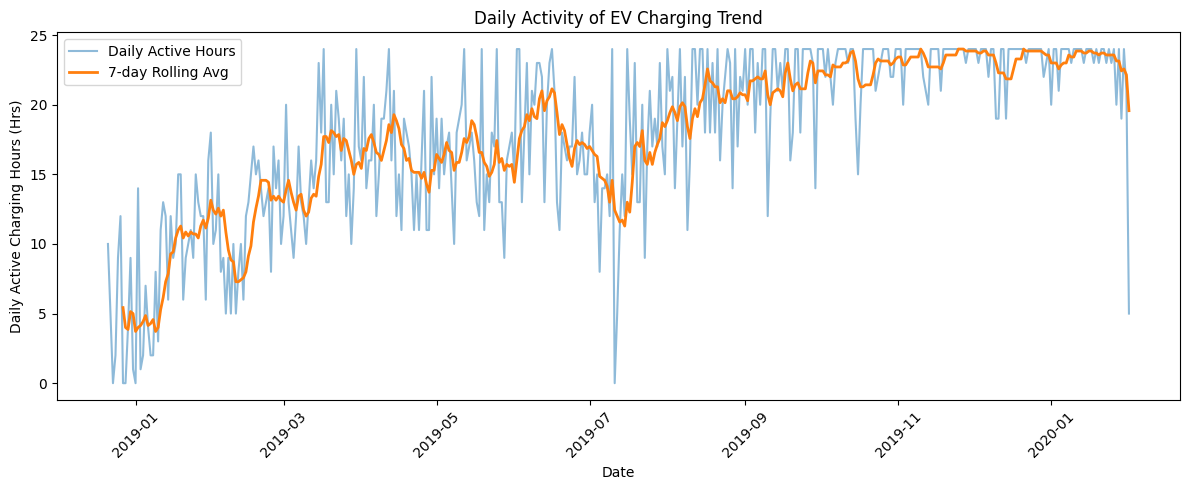

In [137]:
daily_active_hrs["rolling_7d"] = (
    daily_active_hrs["active"]
    .rolling(window=7)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(
    daily_active_hrs["day"],
    daily_active_hrs["active"],
    alpha=0.5,
    label="Daily Active Hours"
)

plt.plot(
    daily_active_hrs["day"],
    daily_active_hrs["rolling_7d"],
    linewidth=2,
    label="7-day Rolling Avg"
)

plt.xlabel("Date")
plt.ylabel("Daily Active Charging Hours (Hrs)")
plt.title("Daily Activity of EV Charging Trend")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


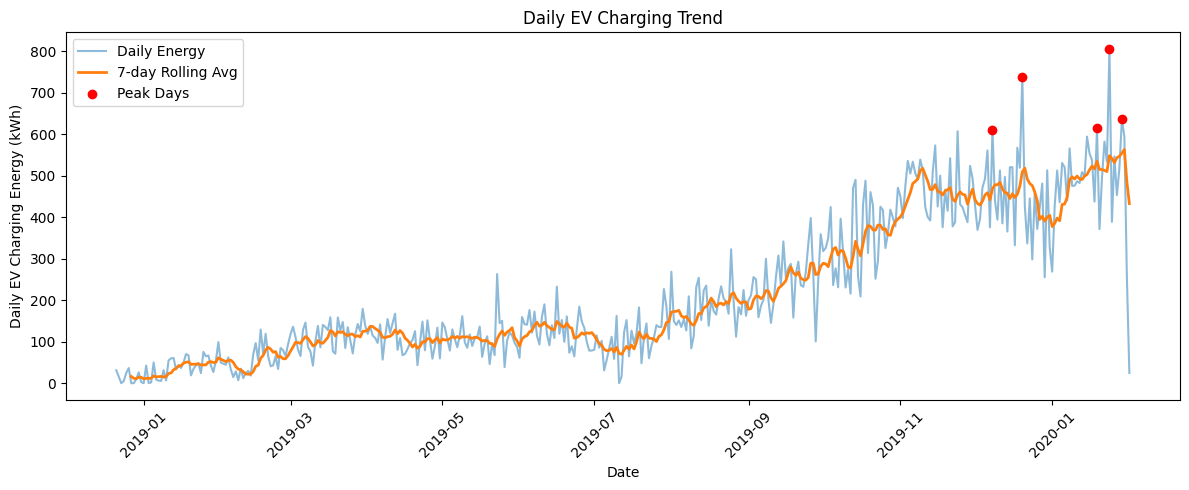

In [44]:
# identify top peak days
top_peaks = daily_load_df.nlargest(5, "daily_energy_kwh")

daily_load_df["rolling_7d"] = (
    daily_load_df["daily_energy_kwh"]
    .rolling(window=7)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(
    daily_load_df["day"],
    daily_load_df["daily_energy_kwh"],
    alpha=0.5,
    label="Daily Energy"
)

plt.plot(
    daily_load_df["day"],
    daily_load_df["rolling_7d"],
    linewidth=2,
    label="7-day Rolling Avg"
)

plt.scatter(
    top_peaks["day"],
    top_peaks["daily_energy_kwh"],
    zorder=5,
    color='red',
    label="Peak Days"
)

plt.xlabel("Date")
plt.ylabel("Daily EV Charging Energy (kWh)")
plt.title("Daily EV Charging Trend")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
